##🧠 Projeto: Segmentação de Clientes com Clusterização
####🎯 Objetivo
#####Utilizar técnicas de clusterização para segmentar os clientes de um shopping center com base em características demográficas e comportamentais, visando estratégias de marketing mais personalizadas.

##01 - Instalação e Importação de Bibliotecas:

In [1]:
!pip install -q seaborn scikit-learn

In [2]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

##02 - Carregamento da Base:

In [3]:
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


##03 - Análise Exploratória (EDA):

In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


Text(0.5, 1.0, 'Score de Gastos por Gênero')

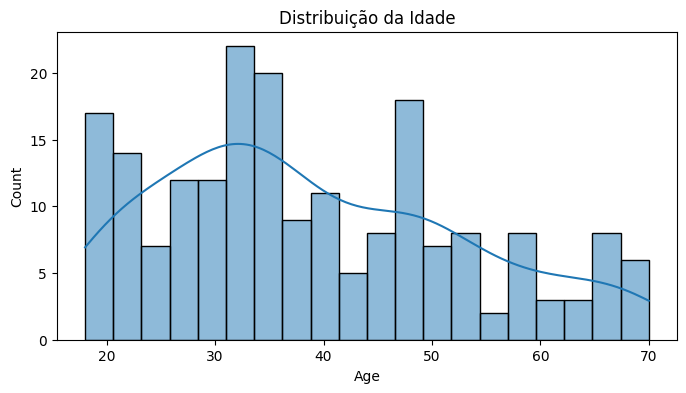

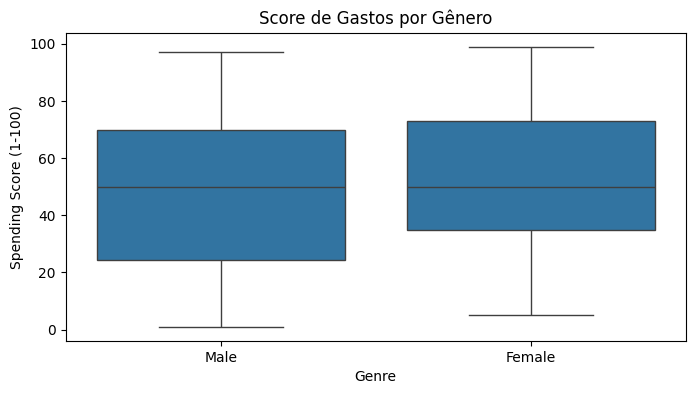

In [6]:
# Distribuição de idade
plt.figure(figsize=(8,4))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Distribuição da Idade')

# Boxplot por gênero
plt.figure(figsize=(8,4))
sns.boxplot(x='Genre', y='Spending Score (1-100)', data=df)
plt.title('Score de Gastos por Gênero')

##04 - Pré-processamento dos Dados

In [8]:
X = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [9]:
X['Genre'] = X['Genre'].map({'Male': 1, 'Female': 0})


<ipython-input-9-949826659cb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Genre'] = X['Genre'].map({'Male': 1, 'Female': 0})


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 05 - Encontrar o Número Ideal de Clusters (K)

Text(0.5, 1.0, 'Método do Cotovelo')

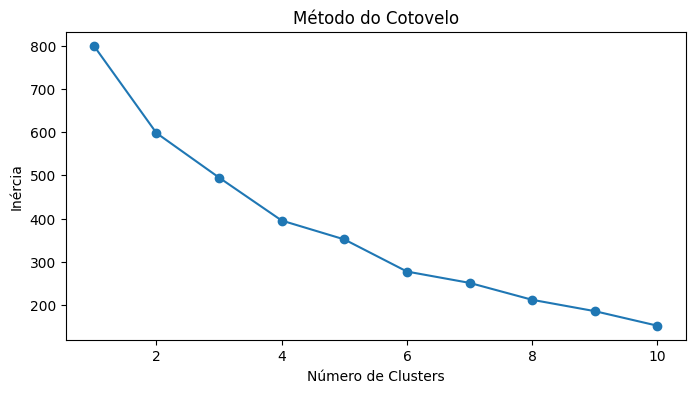

In [11]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo')


In [27]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f'K={k} → Silhouette Score: {score:.4f}')



K=2 → Silhouette Score: 0.2776
K=3 → Silhouette Score: 0.2576
K=4 → Silhouette Score: 0.2901
K=5 → Silhouette Score: 0.2719
K=6 → Silhouette Score: 0.3348


##06 -  Aplicar o K-Means

In [28]:
kmeans = KMeans(n_clusters=6, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


##07 - Análise dos Clusters

In [29]:
# Médias por cluster
df.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,57.214286,46.785714,38.714286
1,39.000000,88.333333,14.428571
2,28.410256,58.230769,70.717949
3,33.206897,91.034483,72.137931
4,25.888889,41.277778,57.944444
5,49.914894,54.255319,36.531915


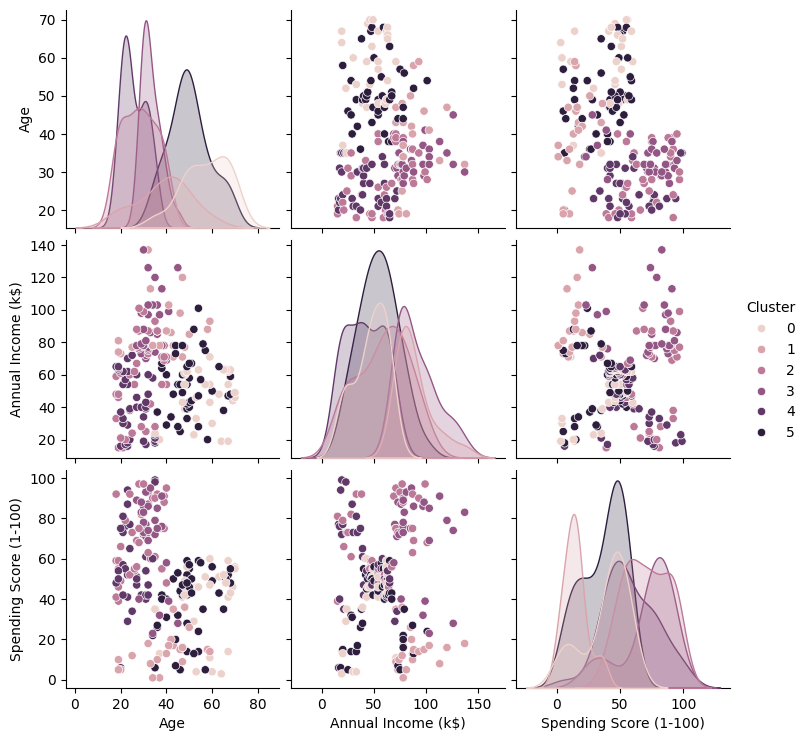

In [30]:
sns.pairplot(df, hue='Cluster', vars=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])


In [31]:
def nomear_cluster(linha):
    if linha['Cluster'] == 0:
        return 'Maduros Moderados'
    elif linha['Cluster'] == 1:
        return 'Ricos Conservadores'
    elif linha['Cluster'] == 2:
        return 'Jovens Gastadores'
    elif linha['Cluster'] == 3:
        return 'Premium Engajados'
    elif linha['Cluster'] == 4:
        return 'Aspirantes Jovens'
    elif linha['Cluster'] == 5:
        return 'Experientes Reservados'

df['Segmento'] = df.apply(nomear_cluster, axis=1)



##08 - Redução de Dimensionalidade com PCA

Text(0.5, 1.0, 'Clusters com Redução PCA')

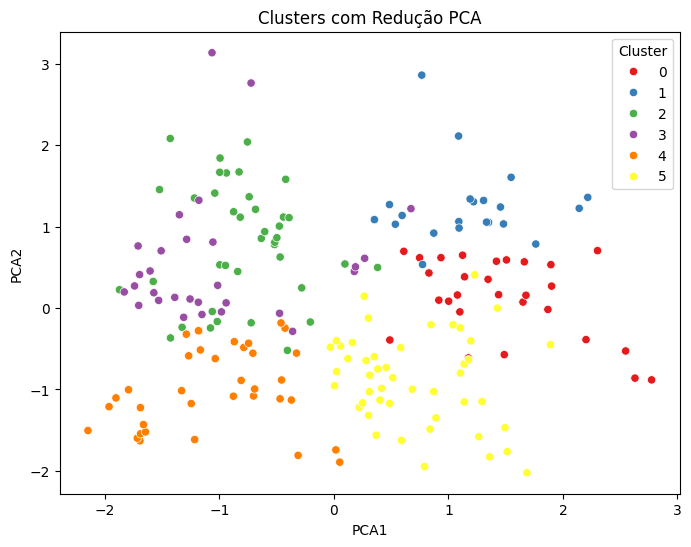

In [32]:
pca = PCA(n_components=2)
components = pca.fit_transform(X_scaled)

df['PCA1'] = components[:,0]
df['PCA2'] = components[:,1]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title('Clusters com Redução PCA')


In [33]:
#validando o score dos clusters aplicados
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {score:.4f}')


Silhouette Score: 0.3348


##09 - Exportar Gráficos e Resultados

In [25]:
plt.savefig("cluster_pca_plot.png")
df.to_csv("mall_customers_clustered.csv", index=False)


<Figure size 640x480 with 0 Axes>